**Credit Card Fraud Detection using logistic Regression**

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Exploratory Data Analysis


loading data to a Pandas Dataframe

In [ ]:
creditcard_data = pd.read_csv('/content/creditcard.csv')


Understanding the Data

In [ ]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset Information

In [ ]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [ ]:
creditcard_data.shape

(7973, 31)

In [ ]:
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,...,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,...,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,...,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,...,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,...,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,...,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


Handling Duplicate Values

In [ ]:
creditcard_data.duplicated().sum()

39

In [ ]:
creditcard = creditcard_data.drop_duplicates()

Handling Missing values

In [ ]:
# Cheking percent of missing values in columns
creditcard_data_missing_columns = (round(((creditcard_data.isnull().sum()/len(creditcard_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
creditcard_data_missing_columns

,null
V15,0.01
V16,0.01
Amount,0.01
V28,0.01
V27,0.01
V26,0.01
V25,0.01
V24,0.01
V23,0.01
V22,0.01


There is some missing data in the dataset, therefore  performing some method to deal with missing data 

In [ ]:
# drop all rows containing null
creditcard_data.dropna()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967,10980,-0.046786,0.030050,2.037794,-0.670130,-0.727283,-0.588537,-0.067966,-0.370767,0.228931,...,0.264364,1.078896,-0.097768,0.375679,-0.500253,-0.159051,-0.018267,-0.061794,39.00,0.0
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0


from the data it can be observed that there is no missing value in any of the column.

Distribution of Legit and fraud Transactiions


In [ ]:
Classes = creditcard_data['Class'].value_counts()
Classes


0.0    7947
1.0      25
Name: Class, dtype: int64

In [ ]:
legit_share = round((Classes[0]/creditcard_data['Class'].count()*100),2)
legit_share

99.69

In [ ]:
fraud_share = round((Classes[1]/creditcard_data['Class'].count()*100),2)
fraud_share

0.31

Only 0.31% fraud cases therefore we have to take care of class imbalance.

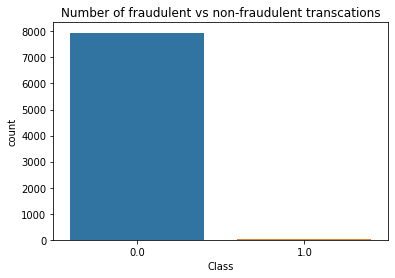

In [ ]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data = creditcard_data )
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

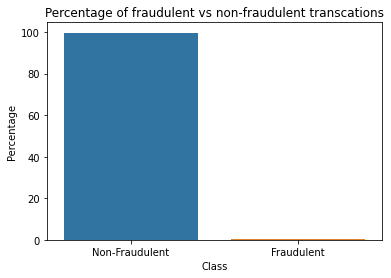

In [ ]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[legit_share, fraud_share]} 
creditcard_data_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=creditcard_data_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

Seperating Data for Analysis

In [ ]:
legit = creditcard_data[creditcard_data.Class == 0]
print(legit.shape)


(7947, 31)


In [ ]:
fraud = creditcard_data[creditcard_data['Class'] == 1]
print(fraud.shape)

(25, 31)


Statistical measure of data

In [ ]:
legit.Amount.describe()



count    7947.000000
mean       65.284891
std       194.126547
min         0.000000
25%         4.795000
50%        15.950000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()



count      25.000000
mean      106.308400
std       372.676883
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


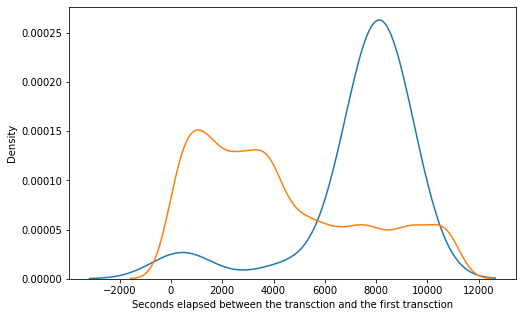

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(legit['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

**Analysis**


We do not see any specific pattern for the fraudulent and legit transctions with respect to Time. Hence, we can drop the Time column.



Observe the distribution of classes with Amount


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


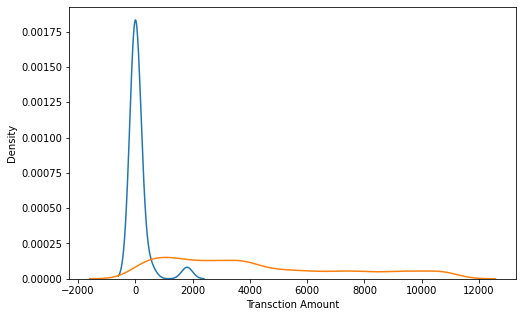

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(legit['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()


**Analysis**


We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

Comparing the values for both transaction.

In [ ]:
creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4246.546496,-0.297235,0.286979,0.917142,0.201968,-0.023263,0.164019,-0.019547,-0.072779,0.662196,...,0.042418,-0.055123,-0.165485,-0.034918,0.026636,0.088960,0.019511,0.014875,0.000417,65.284891
1.0,7359.240000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400


Plotting the Correlation Matrix

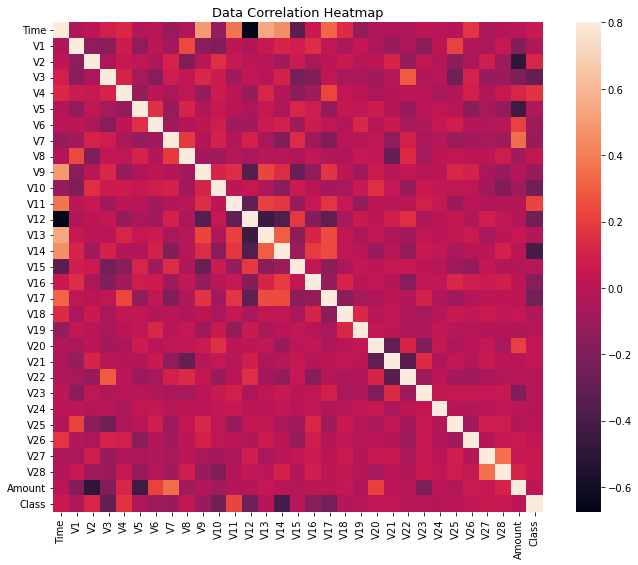

In [ ]:
# Correlation matrix
corrmat = creditcard_data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.title('Data Correlation Heatmap', y = 1.12, size = 13, loc = "center")
plt.show()


In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other.

 


**Under sampling**

build a sample data set containing similar distribution of legit and fraudulent transaction

In [ ]:
legit_sample = legit.sample(n=25)

concatinating two dataframes

In [ ]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2865,2428,-0.322984,0.711644,0.896844,-2.152729,0.429934,-1.215491,1.174949,-0.421007,0.841764,...,0.029648,0.476991,-0.359698,-0.104292,0.145480,-0.809105,0.239337,-0.018368,1.00,0.0
1990,1528,-1.558068,0.721405,1.364943,-2.266201,-0.073941,0.967624,-0.221878,-2.369751,1.554586,...,2.310293,-0.272759,-0.440352,-1.040002,0.906972,-0.533808,-0.011888,-0.183157,69.00,0.0
5641,5856,1.012633,0.185475,1.857025,2.625659,-0.813666,0.741190,-1.050536,0.411454,1.078232,...,0.167710,0.665263,0.034245,0.149376,0.061459,0.073727,0.024627,0.023361,12.14,0.0
4107,3742,1.233733,-0.687681,0.277518,-0.759176,-0.480819,0.288805,-0.739279,0.045087,0.302610,...,-0.175118,-0.552846,-0.005240,-0.893777,0.183819,-0.464045,-0.019802,0.007451,85.46,0.0
1892,1462,1.294446,0.499666,-0.792481,0.527639,0.481296,-0.622905,0.249390,-0.095526,-0.303471,...,-0.145205,-0.413296,-0.189173,-0.594400,0.638510,0.403843,-0.041412,0.017249,0.76,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6870,8757,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,...,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.00,1.0
6882,8808,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,...,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1.10,1.0
6899,8878,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00,1.0
6903,8886,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,...,0.716720,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1.00,1.0
6971,9064,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    25
1.0    25
Name: Class, dtype: int64

Now our data set is balanced.

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,3651.64,0.571656,0.055187,0.681760,0.123784,-0.321299,0.322620,-0.476869,-0.325989,0.475515,...,-0.144943,0.259318,-0.427313,0.014014,-0.068071,0.207583,0.050955,0.018887,0.006122,43.6848
1.0,7359.24,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.3084


Splitting data into feature and target

In [ ]:
X = new_dataset.drop(columns = 'Class',axis = 1)
Y = new_dataset['Class']

In [ ]:
print(X)

       Time        V1        V2        V3        V4        V5        V6  \
2865   2428 -0.322984  0.711644  0.896844 -2.152729  0.429934 -1.215491   
1990   1528 -1.558068  0.721405  1.364943 -2.266201 -0.073941  0.967624   
5641   5856  1.012633  0.185475  1.857025  2.625659 -0.813666  0.741190   
4107   3742  1.233733 -0.687681  0.277518 -0.759176 -0.480819  0.288805   
1892   1462  1.294446  0.499666 -0.792481  0.527639  0.481296 -0.622905   
4279   3756  1.315327 -0.825985 -0.965030 -1.580164  1.414356  3.290771   
1611   1252 -0.719833  0.920275  1.320202  0.713564 -0.452078  0.243132   
584     438  1.491574 -1.088278  0.552852 -1.289876 -1.391175 -0.101768   
4396   3766  1.442638 -0.615611 -0.891136 -1.633695  1.479349  3.267056   
1485   1159  0.676930 -0.459534  0.312400  2.858781 -0.422098  0.172131   
2130   1639  0.711008 -1.115349  0.984987  0.300832 -1.264504  0.365257   
7935  10968  1.246477 -0.003845  0.869939  0.325952 -0.836926 -0.835495   
5268   5110  1.191549  0.

In [ ]:
print(Y)

2865    0.0
1990    0.0
5641    0.0
4107    0.0
1892    0.0
4279    0.0
1611    0.0
584     0.0
4396    0.0
1485    0.0
2130    0.0
7935    0.0
5268    0.0
254     0.0
5896    0.0
1014    0.0
322     0.0
96      0.0
5813    0.0
1762    0.0
4874    0.0
4904    0.0
6781    0.0
7029    0.0
5814    0.0
541     1.0
623     1.0
4920    1.0
6108    1.0
6329    1.0
6331    1.0
6334    1.0
6336    1.0
6338    1.0
6427    1.0
6446    1.0
6472    1.0
6529    1.0
6609    1.0
6641    1.0
6717    1.0
6719    1.0
6734    1.0
6774    1.0
6820    1.0
6870    1.0
6882    1.0
6899    1.0
6903    1.0
6971    1.0
Name: Class, dtype: float64


splitting Data into training and test data set 

In [ ]:
# Splitting data into train and test set 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2,stratify = Y, random_state=100)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(50, 30) (40, 30) (10, 30)


**Model Training : Logistic Regression**

In [ ]:
model = LogisticRegression()

Training model with training data

In [ ]:
model.fit(X_train,Y_train)

Model Evaluation

Accuracy Score

In [ ]:
#Accuracy on training Data

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("Accuracy on Training Data :",training_data_accuracy)

Accuracy on Training Data : 1.0


Train data Accuracy

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print("Accuracy on Test Data :",test_data_accuracy)

Accuracy on Test Data : 1.0


Building a Random Forest Model using skicit learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
# predictions
yPred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
 

In [ ]:
n_outliers = len(fraud)
n_errors = (yPred != Y_test).sum()
print("The model used is Random Forest classifier")
 
acc = accuracy_score(Y_test, yPred)
print("The accuracy is {}".format(acc))
 
prec = precision_score(Y_test, yPred)
print("The precision is {}".format(prec))
 
rec = recall_score(Y_test, yPred)
print("The recall is {}".format(rec))
 
f1 = f1_score(Y_test, yPred)
print("The F1-Score is {}".format(f1))
 
MCC = matthews_corrcoef(Y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 1.0
The precision is 1.0
The recall is 1.0
The F1-Score is 1.0
The Matthews correlation coefficient is1.0


Visualizing the Confusion Matrix

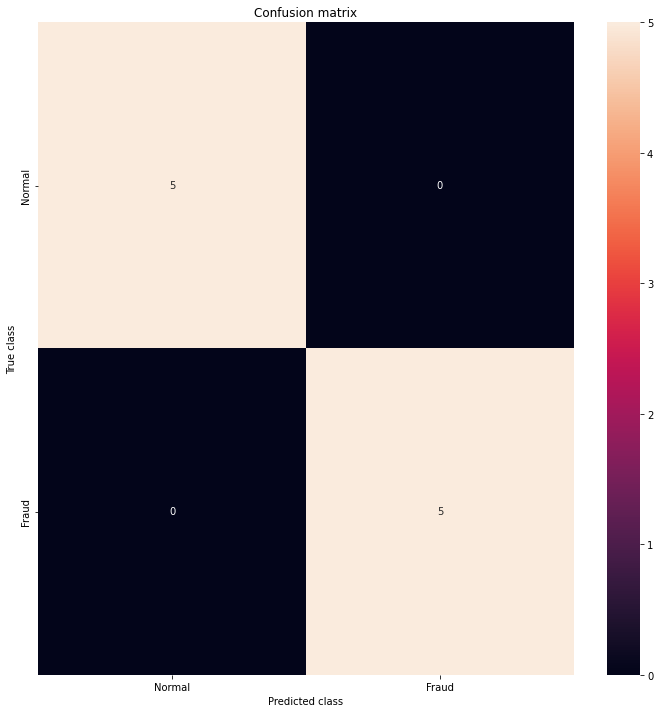

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()